In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, svm, preprocessing
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Preparação do Dataset

In [2]:
# carrega dados da base de iris
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)
iris['class'] = data['target']

class_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
attrib = ['sepal length', 'sepal width', 'petal length', 'petal width']

# define atributos e possíveis saídas da classificação
X = iris.iloc[:,0:4].values
y = iris['class'].values

# define separação da base para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Regressão Linear

Intercepto:  0.3900145486192701
Coeficientes:  [-0.21379928  0.01646584  0.32342789  0.50443347]
{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


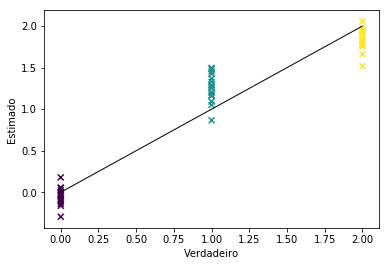

In [3]:
lin_reg_model = linear_model.LinearRegression()

# treina modelo
lin_reg_model = lin_reg_model.fit(X_train, y_train)

# executa o modelo
y_pred = lin_reg_model.predict(X_test)

print('Intercepto: ', lin_reg_model.intercept_) 
print('Coeficientes: ', lin_reg_model.coef_)
print(class_map)

# gera gráfico da regressão
plt.scatter(y_test, y_pred, marker = 'x', c = y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1, c = 'black')
plt.xlabel('Verdadeiro', fontsize = 10)
plt.ylabel('Estimado', fontsize = 10)
plt.show()

### PCA

Componente Principal 1 [ 0.36760197 -0.06649071  0.85410056  0.36188398]
Componente Principal 2 [ 0.63470116  0.7468054  -0.17634312 -0.09131939]


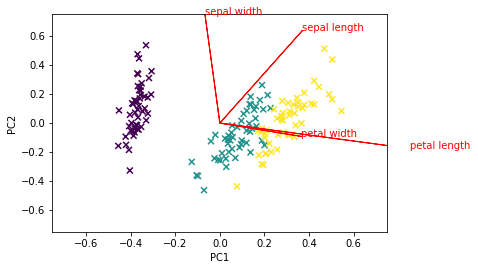

In [4]:
# PCA com dois componentes principais
pca_model = PCA(n_components = 2)
pca_model = pca_model.fit(X_train, y_train)
trf_X = pca_model.transform(X)

print('Componente Principal 1 ' + str(pca_model.components_[0]))
print('Componente Principal 2 ' + str(pca_model.components_[1]))

# captura os valores do primeiro/segundo componente principal
pca1 = trf_X[:,0]
pca2 = trf_X[:,1]

# transpõe os coeficientes para pares ordenados
coeff = np.transpose(pca_model.components_[0:2, :])

# contabiliza o número de pares
n = coeff.shape[0]

# determina o fator de normalização
pca_x = 1.0 / (pca1.max() - pca1.min())
pca_y = 1.0 / (pca2.max() - pca2.min())

# plota gráfico com os dados do PCA na base de iris
plt.scatter(pca1 * pca_x, pca2 * pca_y, c = y, marker = 'x')

# para cada par x e y de coeficientes
for i in range(n):
    
    # imprime reta de cada atributo x e y do coeficiente
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r')
    
    # imprime texto descrevendo a reta
    plt.text(coeff[i,0] , coeff[i,1] , attrib[i], color = 'r')

# determina limites de plotagem
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)

# determina nome dos eixos
plt.xlabel("PC1")
plt.ylabel("PC2")

# apresenta o gráfico
plt.show()

### LDA

Text(0, 0.5, 'LDA2')

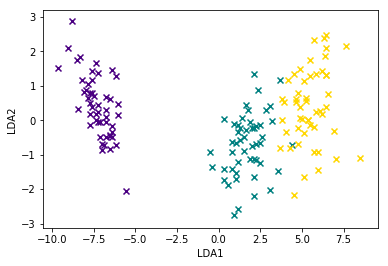

In [5]:
# LDA com dois componentes principais
lda = LinearDiscriminantAnalysis(n_components = 2)
lda = lda.fit(X_train, y_train)
X_lda = lda.transform(X)

# Plot the hyperplanes
for l, c in zip(iris['class'].unique(), ['indigo','teal','gold']):
    plt.scatter(X_lda[y == l,0], X_lda[y == l,1], c = c, marker = 'x', label = l)

plt.xlabel("LDA1")
plt.ylabel("LDA2")

### SVM (Linear)

C:\Users\amaci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


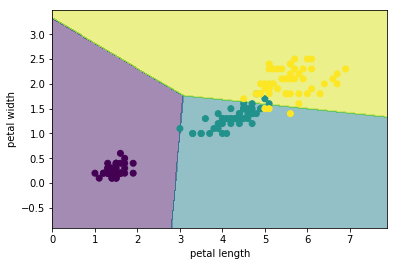

In [6]:
# seleciona dois atributos da base de íris para executar o SVM
X_svm = iris.iloc[:,2:4].values
y_svm = iris['class'].values

# define modelo SVM
svm = LinearSVC(C=100).fit(X_svm, y_svm)

# determina espaço/área para plotar gráfico
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1

# cria arrays para x e y dos dados do SVM
x, y = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# realiza a predição pelo SVM, através dos dados em do espaço em x e y
Z = svm.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

# realiza o preenchimento dos espaços e contorno do gráfico
plt.contourf(x, y, Z, alpha = 0.5)

# plota dados da íris originais
plt.scatter(X_svm[:, 0], X_svm[:, 1], c = y_svm)

plt.xlabel(attrib[2])
plt.ylabel(attrib[3])

plt.show()